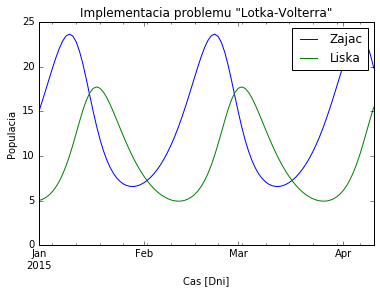

In [10]:
"""
from scipy.integrate import *
from numpy import *
import pylab as p
from ipywidgets import *
import pandas as pd
%matplotlib inline
import matplotlib.pyplot
"""
from numpy import *
import pandas as pd
from scipy.integrate import *
import datetime
from datetime import datetime

import matplotlib as mpl
import matplotlib.pyplot as p
%matplotlib inline

alfa= 1.0   # Growing rate of prey when there's no predators
beta= 0.1   # Dying rate of prey due to predation
gama=1.0    # Dying rate of predators when there's no prey
delta=0.075  # Reproduction rate of predators per 1 prey eaten
Ovce, Vlci = 15,5

#X0=array([Ovce,Vlci])  # pocet pred a predatorov
period=100
time=linspace(0,15,period)
def dx_dt(x,t=0):
    return array([ alfa*x[0]-beta*x[0]*x[1],
                  delta*x[0]*x[1]-gama*x[1] ])
    
X0=array([Ovce,Vlci])
X,infodict=odeint(dx_dt, X0, time, full_output=True)
x_df=pd.DataFrame(X,columns=['Zajac','Liska'])

d=pd.date_range("2015-01-01", periods=period,freq="D")
d_df=pd.DataFrame(d,columns=['Datum'])

eco=d_df.join(x_df)

#
#podme kreslit... :)
#
%matplotlib inline
#from ggplot import *
#simul=pd.melt(eco[['Datum','Zajac', 'Liska']], id_vars='Datum') 
#ggplot(simul, aes(x='Datum', y='value', color='variable', fill='variable')) + \
#    geom_point(alpha=1)

eco.plot(x='Datum')   
p.ylabel('Populacia')
p.xlabel('Cas [Dni]')
p.legend()
p.title('Implementacia problemu "Lotka-Volterra"')